In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score,roc_auc_score, confusion_matrix, f1_score
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTrandformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
metrics_dict = {
    "Model": [],
    "Accuracy": [],
    "F1-score": [],
    "Recall": [],
    "AUC": []
}

In [ ]:
#Change per user
df = pd.read_csv('/content/drive/MyDrive/Exp_Proj_5490/Project/clean_df_copy.csv')

In [ ]:
df.head()

,job title,job function,job category,job group,pay level,work city,work country,work region,gender,tenure bucket,generation,work structure,vol_churn,compa bucket
0,Managing Principal Engineer,Engineering,Management,Management,M4,Fremont,United States,Americas,M,5,Boomer,Onsite,1,75-100%
1,Staff Engineer,Engineering,Engineering Professional,Professional,P4,Remote US,United States,Americas,M,5,Boomer,Remote,0,100%+
2,Sr Staff Program/Project Manager,Information Technology,Professional,Professional,P5,Fremont,United States,Americas,F,5,Gen X,Onsite,0,75-100%
3,Technologist,Engineering,Engineering Professional,Professional,P7,Longmont,United States,Americas,M,5,Boomer,Onsite,0,75-100%
4,Sr Engineering Specialist,Engineering Services,Operations Support,Support,S5,Fremont,United States,Americas,M,5,Gen X,Onsite,0,100%+


In [ ]:
df_log = df

In [ ]:
# dummying
types = df_log.dtypes

cats = []
num = []

for i in range(len(types)):
    if types[i] == object:
        cats.append(types.index[i])
    else:
        num.append(types.index[i])


# dummying
cat_vars = cats
for var in cat_vars:
    cat_list = pd.get_dummies(df_log[var], dtype=float)
    cat_list.columns = [var + '_' + str(col) for col in cat_list.columns]
    df_log = pd.concat([df_log, cat_list], axis=1)
    df_log.drop(columns=[var], inplace=True)

df_log.reset_index(drop=True, inplace=True)

In [ ]:
# RFE
feature_df = df_log[['tenure bucket',
 'job title_Account Director',
 'job title_Account Manager I',
 'job title_Account Manager II',
 'job title_Accountant I',
 'job title_Accountant II',
 'job title_Administrative Assistant',
 'job title_Administrator I',
 'job title_Administrator II',
 'job title_Analyst I',
 'job title_Artist II',
 'job title_Assistant General Counsel',
 'job title_Assistant IV',
 'job title_Counsel II',
 'job title_Engineer I',
 'job title_Engineering Specialist II',
 'job title_Engineering Specialist III',
 'job title_Engineering Specialist IV',
 'job title_Managing Principal Engineer',
 'job title_Principal Analyst',
 'job title_Principal Product Manager',
 'job title_Representative III',
 'job title_Sr Account Manager',
 'job title_Sr Artist',
 'job title_Sr Engineer',
 'job title_Sr Engineering Specialist',
 'job title_Sr Program/Project Manager',
 'job title_Sr Team Lead',
 'job title_Staff Analyst',
 'job title_Staff Business Partner',
 'job title_Staff Commodity Manager',
 'job title_Supervisor II',
 'job function_Engineering',
 'job function_Engineering Services',
 'job function_Finance/Accounting',
 'job function_Human Resources',
 'job function_Information Technology',
 'job function_Legal',
 'job function_Manufacturing',
 'job function_Marketing',
 'job function_Materials',
 'job function_Quality',
 'job function_Sales',
 'job category_Management',
 'job category_Sales Management',
 'job category_Support',
 'job group_Management',
 'job group_Professional',
 'job group_Support',
 'pay level_M2',
 'pay level_M4',
 'pay level_M5',
 'pay level_P1',
 'pay level_P2',
 'pay level_P6',
 'pay level_P8',
 'pay level_S1',
 'pay level_S2',
 'pay level_S3',
 'pay level_S4',
 'pay level_SM5',
 'work city_Guadalajara',
 'work city_Johor',
 'work city_Korat',
 'work city_Longmont',
 'work city_Munich',
 'work city_Normandale',
 'work city_Ontario',
 'work city_Penang',
 'work city_Portland',
 'work city_Remote US',
 'work city_Shakopee',
 'work city_Woodlands  W1',
 'work city_Woodlands  W2',
 'work country_China',
 'work country_India',
 'work country_Malaysia',
 'work country_Thailand',
 'work country_United Kingdom',
 'work country_United States',
 'work region_Americas',
 'work region_Asia Pacific',
 'work region_EMEA',
 'gender_D',
 'generation_Boomer',
 'generation_Gen X',
 'generation_Gen Z',
 'generation_Millennial',
 'work structure_Hybrid',
 'work structure_Onsite',
 'work structure_Remote',
 'compa bucket_100%+',
 'compa bucket_50-75%',
 'compa bucket_75-100%']].copy()

In [ ]:
# Assuming you have your features X and target variable y ready
X= feature_df
y= df_log['vol_churn']

X= feature_df
y= df_log['vol_churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state = 42)

In [ ]:
# Create a Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier()

# Train the model using the training set
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
pred_test_GBM = gbm_model.predict(X_test)

# Collect metrics for test set
test_accuracy = accuracy_score(y_test, pred_test_GBM)
test_f1_score = f1_score(y_test, pred_test_GBM)
test_recall = recall_score(y_test, pred_test_GBM)
test_auc = roc_auc_score(y_test, pred_test_GBM)

# Update metrics dictionary with test set metrics
metrics_dict["Model"].append("GradientBoostingClassifier")
metrics_dict["Accuracy"].append(test_accuracy)
metrics_dict["F1-score"].append(test_f1_score)
metrics_dict["Recall"].append(test_recall)
metrics_dict["AUC"].append(test_auc)

In [ ]:
conf_matrix = confusion_matrix(y_test, pred_test_GBM)

table = pd.DataFrame(data=conf_matrix, columns=['Predicted Active (0)', 'Predicted Voluntary Termination (1)'],
                     index=['Actual Active (0)', 'Actual Voluntary Termination (1)'])

table

,Predicted Active (0),Predicted Voluntary Termination (1)
Actual Active (0),2091,243
Actual Voluntary Termination (1),522,650


In [ ]:
# Create a Support Vector Classifier model
svc = SVC()

# Train the model using the training set
svc.fit(X_train, y_train)

# Make predictions on the test set
pred_test_svc = svc.predict(X_test)

# Collect metrics for test set
test_accuracy_svc = accuracy_score(y_test, pred_test_svc)
test_f1_score_svc = f1_score(y_test, pred_test_svc)
test_recall_svc = recall_score(y_test, pred_test_svc)
test_auc_svc = roc_auc_score(y_test, pred_test_svc)

# Update metrics dictionary with test set metrics
metrics_dict["Model"].append("SVC")
metrics_dict["Accuracy"].append(test_accuracy_svc)
metrics_dict["F1-score"].append(test_f1_score_svc)
metrics_dict["Recall"].append(test_recall_svc)
metrics_dict["AUC"].append(test_auc_svc)

In [ ]:
conf_matrix_svc = confusion_matrix(y_test, pred_test_svc)

# Create the table
table_svc = pd.DataFrame(data=conf_matrix_svc, columns=['Predicted Active (0)', 'Predicted Voluntary Termination (1)'],
                         index=['Actual Active (0)', 'Actual Voluntary Termination (1)'])

# Print the table
table_svc

,Predicted Active (0),Predicted Voluntary Termination (1)
Actual Active (0),2148,186
Actual Voluntary Termination (1),558,614


In [ ]:
# Instantiate the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred_test_rf = rf_classifier.predict(X_test)
pred_test_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate metrics on the test set
test_accuracy_rf = accuracy_score(y_test, pred_test_rf)
test_recall_rf = recall_score(y_test, pred_test_rf, average='weighted')

# Update metrics dictionary with test set metrics
metrics_dict["Model"].append("RandomForestClassifier")
metrics_dict["Accuracy"].append(test_accuracy_rf)
metrics_dict["F1-score"].append(f1_score(y_test, pred_test_rf))
metrics_dict["Recall"].append(test_recall_rf)
metrics_dict["AUC"].append(roc_auc_score(y_test, pred_test_proba_rf))


In [ ]:
conf_matrix_rf = confusion_matrix(y_test, pred_test_rf)

table_rf = pd.DataFrame(data=conf_matrix_rf, columns=['Predicted Active (0)', 'Predicted Voluntary Termination (1)'],
                        index=['Actual Active (0)', 'Actual Voluntary Termination (1)'])

table_rf

,Predicted Active (0),Predicted Voluntary Termination (1)
Actual Active (0),2048,286
Actual Voluntary Termination (1),461,711


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model using the training set
xgb.fit(X_train, y_train)

# Make predictions on the test set
pred_test = xgb.predict(X_test)
pred_test_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate metrics on the test set
accuracy_test = accuracy_score(y_test, pred_test)
roc_auc_test = roc_auc_score(y_test, pred_test_proba)

# Update metrics dictionary with test set metrics
metrics_dict["Model"].append("XGBoostClassifier")
metrics_dict["Accuracy"].append(accuracy_test)
metrics_dict["F1-score"].append(f1_score(y_test, pred_test))
metrics_dict["Recall"].append(recall_score(y_test, pred_test))
metrics_dict["AUC"].append(roc_auc_test)

In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, pred_test)

# Create the table
table_xgb = pd.DataFrame(data=conf_matrix_xgb, columns=['Predicted Active (0)', 'Predicted Voluntary Termination (1)'],
                         index=['Actual Active (0)', 'Actual Voluntary Termination (1)'])
table_xgb

,Predicted Active (0),Predicted Voluntary Termination (1)
Actual Active (0),2080,254
Actual Voluntary Termination (1),455,717


Analysis of Employee Churn Prediction Model: Understanding Performance and Opportunities for Improvement - Logistic Regression

In [ ]:
# Define numerical and categorical features
numerical_features = ['tenure bucket']
categorical_features = ['job title_Account Director',
 'job title_Account Manager I',
 'job title_Account Manager II',
 'job title_Accountant I',
 'job title_Accountant II',
 'job title_Administrative Assistant',
 'job title_Administrator I',
 'job title_Administrator II',
 'job title_Analyst I',
 'job title_Artist II',
 'job title_Assistant General Counsel',
 'job title_Assistant IV',
 'job title_Counsel II',
 'job title_Engineer I',
 'job title_Engineering Specialist II',
 'job title_Engineering Specialist III',
 'job title_Engineering Specialist IV',
 'job title_Managing Principal Engineer',
 'job title_Principal Analyst',
 'job title_Principal Product Manager',
 'job title_Representative III',
 'job title_Sr Account Manager',
 'job title_Sr Artist',
 'job title_Sr Engineer',
 'job title_Sr Engineering Specialist',
 'job title_Sr Program/Project Manager',
 'job title_Sr Team Lead',
 'job title_Staff Analyst',
 'job title_Staff Business Partner',
 'job title_Staff Commodity Manager',
 'job title_Supervisor II',
 'job function_Engineering',
 'job function_Engineering Services',
 'job function_Finance/Accounting',
 'job function_Human Resources',
 'job function_Information Technology',
 'job function_Legal',
 'job function_Manufacturing',
 'job function_Marketing',
 'job function_Materials',
 'job function_Quality',
 'job function_Sales',
 'job category_Management',
 'job category_Sales Management',
 'job category_Support',
 'job group_Management',
 'job group_Professional',
 'job group_Support',
 'pay level_M2',
 'pay level_M4',
 'pay level_M5',
 'pay level_P1',
 'pay level_P2',
 'pay level_P6',
 'pay level_P8',
 'pay level_S1',
 'pay level_S2',
 'pay level_S3',
 'pay level_S4',
 'pay level_SM5',
 'work city_Guadalajara',
 'work city_Johor',
 'work city_Korat',
 'work city_Longmont',
 'work city_Munich',
 'work city_Normandale',
 'work city_Ontario',
 'work city_Penang',
 'work city_Portland',
 'work city_Remote US',
 'work city_Shakopee',
 'work city_Woodlands  W1',
 'work city_Woodlands  W2',
 'work country_China',
 'work country_India',
 'work country_Malaysia',
 'work country_Thailand',
 'work country_United Kingdom',
 'work country_United States',
 'work region_Americas',
 'work region_Asia Pacific',
 'work region_EMEA',
 'gender_D',
 'generation_Boomer',
 'generation_Gen X',
 'generation_Gen Z',
 'generation_Millennial',
 'work structure_Hybrid',
 'work structure_Onsite',
 'work structure_Remote',
 'compa bucket_100%+',
 'compa bucket_50-75%',
 'compa bucket_75-100%']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Create the pipeline with the preprocessor and a logistic regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter for convergence
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the validation set
pred_test_lrf = pipeline.predict(X_test)

# Calculate evaluation metrics on the validation set
test_accuracy_lrf = accuracy_score(y_test, pred_test_lrf)
test_f1_score_lrf = f1_score(y_test, pred_test_lrf)
test_recall_lrf = recall_score(y_test, pred_test_lrf)
test_auc_lrf = roc_auc_score(y_test, pred_test_lrf)

# Update metrics dictionary with validation set metrics
metrics_dict["Model"].append("LogisticRegression")
metrics_dict["Accuracy"].append(test_accuracy_lrf)
metrics_dict["F1-score"].append(test_f1_score_lrf)
metrics_dict["Recall"].append(test_recall_lrf)
metrics_dict["AUC"].append(test_auc_lrf)


In [ ]:
conf_matrix_lrf = confusion_matrix(y_test, pred_test_lrf)

# Create the table
table_lrf = pd.DataFrame(data=conf_matrix_lrf, columns=['Predicted Active (0)', 'Predicted Voluntary Termination (1)'],
                         index=['Actual Active (0)', 'Actual Voluntary Termination (1)'])

# Print the table
table_lrf

,Predicted Active (0),Predicted Voluntary Termination (1)
Actual Active (0),2079,255
Actual Voluntary Termination (1),544,628


In [ ]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
pred_test_lrn = model.predict(X_test)

# Calculate evaluation metrics on the test set
test_accuracy_lrn = accuracy_score(y_test, pred_test_lrn)
test_f1_score_lrn = f1_score(y_test, pred_test_lrn)
test_recall_lrn = recall_score(y_test, pred_test_lrn)
test_auc_lrn = roc_auc_score(y_test, pred_test_lrn)

# Update metrics dictionary with test set metrics
metrics_dict["Model"].append("LogisticRegression")
metrics_dict["Accuracy"].append(test_accuracy_lrn)
metrics_dict["F1-score"].append(test_f1_score_lrn)
metrics_dict["Recall"].append(test_recall_lrn)
metrics_dict["AUC"].append(test_auc_lrn)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
conf_matrix_lrn = confusion_matrix(y_test, pred_test_lrn)

# Create the table
table_lrn = pd.DataFrame(data=conf_matrix_lrn, columns=['Predicted Active (0)', 'Predicted Voluntary Termination (1)'],
                         index=['Actual Active (0)', 'Actual Voluntary Termination (1)'])

# Print the table
table_lrn

,Predicted Active (0),Predicted Voluntary Termination (1)
Actual Active (0),2079,255
Actual Voluntary Termination (1),543,629


Results df

In [ ]:
# Create DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
metrics_df

,Model,Accuracy,F1-score,Recall,AUC
0,GradientBoostingClassifier,0.781803,0.629540,0.554608,0.725247
1,SVC,0.787792,0.622718,0.523891,0.722100
2,RandomForestClassifier,0.786937,0.655602,0.786937,0.828891
3,XGBoostClassifier,0.797775,0.669155,0.611775,0.847244
4,LogisticRegression,0.772105,0.611192,0.535836,0.713291
5,LogisticRegression,0.772390,0.611868,0.536689,0.713717


In [ ]:
#Find key features leading to churn
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_rf_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_rf_df.head(10))

                     Feature  Importance
0              tenure bucket    0.252673
92       compa bucket_50-75%    0.063132
91        compa bucket_100%+    0.029307
87     generation_Millennial    0.028307
93      compa bucket_75-100%    0.028281
77     work country_Thailand    0.024394
32  job function_Engineering    0.023335
75        work country_India    0.021436
85          generation_Gen X    0.021422
89     work structure_Onsite    0.020264


In [ ]:
#Find key features leading to churn
importance = xgb.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

feature_importance_xgb_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_xgb_df.head(10))

                                Feature  Importance
15  job title_Engineering Specialist II    0.103212
92                  compa bucket_50-75%    0.086149
0                         tenure bucket    0.055420
89                work structure_Onsite    0.051755
48                    job group_Support    0.040219
82                     work region_EMEA    0.039586
14                 job title_Engineer I    0.039181
86                     generation_Gen Z    0.031941
57                         pay level_S2    0.028849
75                   work country_India    0.026626


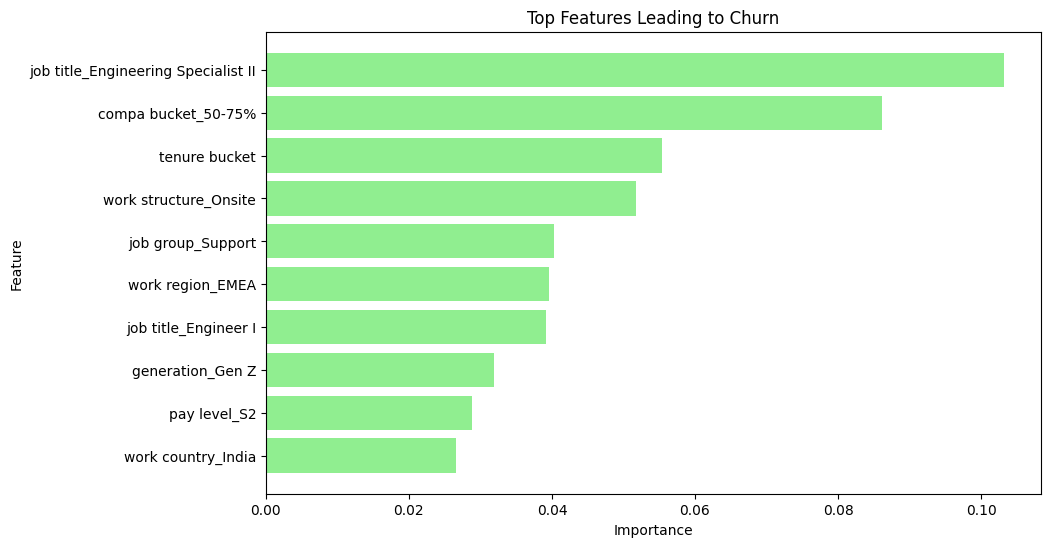

In [ ]:
top_features = feature_importance_xgb_df.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features Leading to Churn')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

In [ ]:
df_log

,tenure bucket,vol_churn,job title_Account Director,job title_Account Manager I,job title_Account Manager II,job title_Accountant I,job title_Accountant II,job title_Administrative Assistant,job title_Administrator I,job title_Administrator II,...,generation_Gen X,generation_Gen Z,generation_Millennial,work structure_Hybrid,work structure_Onsite,work structure_Remote,compa bucket_100%+,compa bucket_25-50%,compa bucket_50-75%,compa bucket_75-100%
0,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17524,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17525,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17526,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
